Python is a script langauge. This means that it is not directly compiled to assembler, but instead to C-code, which is then compiled to assembler. The advantage over C is that it is easier to code and read, and more robust against human errors (e.g. pointer overflows). It has the usual data types, but you do not necessarily have to declare the data type of variables, functions, etc. Python just infers it. Moreover, it has some support for object orientation, but not to the extent that e.g. Java does. It is mostly a procedural programming language.

## Data types

In [1]:
# First, let us look at some data types
a = 1
b = 2.7
c = "c"
d = [1, 2, 3.5]
e = (1, 2, 3.5)
f = {1: "a", 2: "b", 3: "c", 3.5: "d"}

vs = [a, b, c, d, e, f]

In [2]:
# Now we can access individual components of these arrays, for example
print(a)       # 1
print(d[0])    # 1
print(e[2])    # 3.5
print(f[3.5])  # d

1
1
3.5
d


In [3]:
# I can also convert one data type to another:
print(b, int(b))
print(e, list(e))

2.7 2
(1, 2, 3.5) [1, 2, 3.5]


In [4]:
# NOTE: Python lets you assign values to standard data types, e.g.
real_list = list
list = [1, 2, 3, 4]
print(list)

# This should be illegal (without warning), since now I cannot do anymore
x = list((1, 2, 3, 4))

[1, 2, 3, 4]


TypeError: 'list' object is not callable

In [5]:
list = real_list
x = list((1, 2, 3, 4))
print(x)

[1, 2, 3, 4]


## Loops and Conditionals

In [6]:
# simple loops
for v in vs:  
    # vars is what is called an iterable. 
    # You can iterate over the elements in this list, and so "v in vars" means that v will take on successively the values vars[0], vars[1], ...
    print(v, type(v))

1 <class 'int'>
2.7 <class 'float'>
c <class 'str'>
[1, 2, 3.5] <class 'list'>
(1, 2, 3.5) <class 'tuple'>
{1: 'a', 2: 'b', 3: 'c', 3.5: 'd'} <class 'dict'>


In [7]:
# often, one wants the element as well as its index. The naive possibility is to create a range that just has all indices in it and loop over them
for i in range(len(vs)):
    v = vs[i]
    print("Index {} of vars has value {}.".format(i, v))

Index 0 of vars has value 1.
Index 1 of vars has value 2.7.
Index 2 of vars has value c.
Index 3 of vars has value [1, 2, 3.5].
Index 4 of vars has value (1, 2, 3.5).
Index 5 of vars has value {1: 'a', 2: 'b', 3: 'c', 3.5: 'd'}.


In [8]:
# Since this is needed quite often, we can use enumerate:
for i, v in enumerate(vs):
    print("Index {} of vars has value {}.".format(i, v))

Index 0 of vars has value 1.
Index 1 of vars has value 2.7.
Index 2 of vars has value c.
Index 3 of vars has value [1, 2, 3.5].
Index 4 of vars has value (1, 2, 3.5).
Index 5 of vars has value {1: 'a', 2: 'b', 3: 'c', 3.5: 'd'}.


In [9]:
# Another thing one often needs is to get element 0 of list1 and list2, then element 1 of list1 and list2, etc.
# This can be done with zip. So the above is equivalent to
idx = range(len(vs))
for i, v in zip(idx, vs):
    print("Index {} of vars has value {}.".format(i, v))

Index 0 of vars has value 1.
Index 1 of vars has value 2.7.
Index 2 of vars has value c.
Index 3 of vars has value [1, 2, 3.5].
Index 4 of vars has value (1, 2, 3.5).
Index 5 of vars has value {1: 'a', 2: 'b', 3: 'c', 3.5: 'd'}.


In [10]:
# One can also abort a loop (using break) or skip the rest of the loop (using continue)
for i in range(10):
    if i == 5:
        continue
    print("Index: {}".format(i))
    if i == 7:
        break

Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 6
Index: 7


In [11]:
# The above is an example of unpacking: 
# enumerate(vars) and zip(idx, vars) returns a 2-tuple (number, element in vars), 
# and this tuple is assigned to the variables i and v, respectively.
# Another example for this is
a, b, c = 5, 7, "a"

In [12]:
# Another very common control type are conditional statements:
x = 7.5
if x < 8:
    print("x is smaller than 8.")
elif 8 <= x <= 9:
    print("x is between 8 and 9.")
else:
    print("x is greater than 9.")

x is smaller than 8.


In [13]:
# List comprehensions and conditionals
# One can put iterators and conditional into list generators

# Using the above control structures, we could do
x = []
for i in range(10):
    if i != 5:
        x.append(i)
print(x)

# This can be written succinctly on one line
x = [i for i in range(10) if i != 5]
print(x)

[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8, 9]


## Functions

In [17]:
# The next basic python object we want to introduce are functions
def some_function(x, y, z=0):
    return x**2 + y**2 + z**2

print(some_function(1, 2, 3))

# Here, the variables are called a, b, c
a, b, c = 1, 2, 3
print(some_function(1, 2, 3))
print(some_function(1, 2))

# we can also enforce unpacking in functions using the * operator
args = [1, 2, 3]
print(some_function(*args))

14
14
5
14


In [15]:
# python provides a shortcut (called lambda) for temporary functions that don't really need a name
print((lambda x: x**2)(2))

4


In [18]:
# At this point we also need to mention the scope of variables. This is a source for bugs
print("Using x from outside scope")
x = 1
def some_fct():
    print("Inside function:", x)
print("Before function call:", x)
some_fct()
print("After function call:", x)

# Now we can shadow x from the outside scope by defining a new x inside the function
print("\nShadowing x from outside scope")
x = 1
def some_fct():
    x=2
    print("Inside function:", x)
print("Before function call:", x)
some_fct()
print("After function call:", x)

# Some Python calls are by value, others are by reference
print("\nCall by value")
x = 1
def some_fct(x):
    x += 1
    print("Inside function:", x)
print("Before function call:", x)
some_fct(x)
print("After function call:", x)

print("\nCall by reference")
x = [1, 2, 3]
def some_fct(x):
    x += [4]
    print("Inside function:", x)
print("Before function call:", x)
some_fct(x)
print("After function call:", x)

Using x from outside scope
Before function call: 1
Inside function: 1
After function call: 1

Shadowing x from outside scope
Before function call: 1
Inside function: 2
After function call: 1

Call by value
Before function call: 1
Inside function: 2
After function call: 1

Call by reference
Before function call: [1, 2, 3]
Inside function: [1, 2, 3, 4]
After function call: [1, 2, 3, 4]


## Classes and errors

In [20]:
# The last data structure I want to introduce are classes. 
# These allow to collect variables (called class members) and functions (called class methods) into one object
class Vehicle:
    def __init__(self, honk_lvl):
        self.num_wheels = 4
        self.can_drive = True
        self.intensity = honk_lvl
    
    def honk(self):
        if self.intensity <= 0:
            print("honk")
        elif self.intensity <= 1:
            print("honk!")
        elif self.intensity <= 2:
            print("Honk!")
        else:
            print("HONK!")
    
    def drive(self):
        if self.can_drive:
            print("wroooom")
        else: 
            print("I can't")

my_vehicle = Vehicle(2)
my_vehicle.honk()
my_vehicle.drive()
print(my_vehicle.can_drive)
my_vehicle.can_drive = False
my_vehicle.drive()

class ClownCar(Vehicle):  # ClownCar inherits everything from vehicle
    def __init__(self, honk_lvl):
        super().__init__(honk_lvl)  # super is the parent class, i.e., vehicle
        print("Clown car instance created")
    
    def honk(self):
        print("BEEP!")

    def fit_clowns(self, num_clowns):
        print("I can easily fit {} clowns".format(num_clowns))

    @staticmethod
    def fit_clowns_2(num_clowns):
        print("I can easily fit {} clowns".format(num_clowns))

my_ccar = ClownCar(2)
my_ccar.honk()
my_ccar.drive()
my_ccar.fit_clowns(100)
ClownCar.fit_clowns_2(512)
my_vehicle.fit_clowns(100)
print("This is never reached")

Honk!
wroooom
True
I can't
Clown car instance created
BEEP!
wroooom
I can easily fit 100 clowns
I can easily fit 512 clowns


AttributeError: 'Vehicle' object has no attribute 'fit_clowns'

In [21]:
# we can catch errors and decide what to do, rather than just crash out of the kernel:
try:
    my_vehicle.fit_clowns(100)
except AttributeError as e:
    print("Error:", e)
    print("Did you mean to call this on a clown car instance?")
print("This is reached now")

Error: 'Vehicle' object has no attribute 'fit_clowns'
Did you mean to call this on a clown car instance?
This is reached now


In [22]:
# We can also raise errors
class Boat(Vehicle):  # clown_car inherits everything from vehicle
    def __init__(self, honk_lvl):
        super().__init__(honk_lvl)  # super is the parent class, i.e., vehicle
        print("Boat instance created")
    
    def drive(self):
        raise NotImplementedError("I'm a boat, i can only swim.")
    
    def swim(self):
        print("swoosh")

my_boat = Boat(-1)
try:
    my_boat.drive()
except AttributeError as e:
    print("Error:", e)
    print("Did you mean to call this on a \"clown car\" instance?\n")
except NotImplementedError as e:
    print("Error:", e)
    print("Did you mean to call the \"swim()\" method?\n")

try:
    my_boat.fit_clowns(100)
except AttributeError as e:
    print("Error:", e)
    print("Did you mean to call this on a \"clown car\" instance?\n")
except NotImplementedError as e:
    print("Error:", e)
    print("Did you mean to call the \"swim()\" method?\n")

Boat instance created
Error: I'm a boat, i can only swim.
Did you mean to call the "swim()" method?

Error: 'Boat' object has no attribute 'fit_clowns'
Did you mean to call this on a "clown car" instance?



## Example: Numerical differentiation

In [14]:
def diff(f, x0, eps=1e-6):
    return (f(x0 + eps) - f(x0))/eps

def f(x):
    return x**2

diff(f, 3)

6.000001000927568

## Tensors

In [2]:
# pip install jax jaxlib
import jax
import jax.numpy as jnp

## Vectors and Coordinate transformations

In [22]:
v1 = jnp.array([1, 2, 3], dtype=jnp.float32)
v2 = jnp.array([4, 5, 6], dtype=jnp.float32)

### 3D rotations

In [27]:
def rot_x(theta_x):  # f: R -> R^3
    r_x = jnp.array(
        [[1., 0.              , 0.               ],
         [0., jnp.cos(theta_x), -jnp.sin(theta_x)],
         [0., jnp.sin(theta_x),  jnp.cos(theta_x)]
        ])
    return r_x
    
def rot_y(theta_y): # f: R -> R^3
    r_y = jnp.array(
        [[ jnp.cos(theta_y), 0., jnp.sin(theta_y)],
         [0.               , 1., 0.              ],
         [-jnp.sin(theta_y), 0.,  jnp.cos(theta_y)]
        ])
    return r_y
    
def rot_z(theta_z): # f: R -> R^3
    r_z = jnp.array(
        [[jnp.cos(theta_z), -jnp.sin(theta_z), 0.],
         [jnp.sin(theta_z),  jnp.cos(theta_z), 0.],
         [0.              , 0.               , 1.]
        ])
    return r_z    

In [33]:
v1prime = jnp.einsum('ij,j->i', rot_x(jnp.pi), v1)
print("v1' = R_x(pi).v1: [{:.0f}, {:.0f}, {:.0f}]".format(*v1prime))
print("v1' = R_x(pi).v1: {}".format(v1prime))

v1' = R_x(pi).v1: [1, -2, -3]
v1' = R_x(pi).v1: [ 1.        -1.9999998 -3.0000002]


Look at rotated coordinate system

In [46]:
e1, e2, e3 = jnp.array([1., 0., 0.]), jnp.array([0., 1., 0.]), jnp.array([0., 0., 1.])
o = jnp.einsum('ij,jk,kl->il', rot_x(jnp.sqrt(17)), rot_y(-1.234), rot_z(1/5))
print(o)

[[ 0.32387784 -0.06565329 -0.9438182 ]
 [ 0.65857905 -0.70056975  0.2747286 ]
 [-0.6792473  -0.7105574  -0.18366113]]


In [47]:
b1, b2, b3 = jnp.einsum('ij,j', o, e1), jnp.einsum('ij,j', o, e2), jnp.einsum('ij,j', o, e3)

In [48]:
print("b1={}, b2={}, b3={}".format(b1, b2, b3))

b1=[ 0.32387784  0.65857905 -0.6792473 ], b2=[-0.06565329 -0.70056975 -0.7105574 ], b3=[-0.9438182   0.2747286  -0.18366113]


### Contra-variant vector

For a some random vector $v$ we get

In [63]:
v = 1 * e1 + 2 * e2 - 3 * e3
vprime = jnp.einsum('ij,j', o, v)
print("v  = {}".format(v))
print("v' = {}".format(vprime))

v  = [ 1.  2. -3.]
v' = [ 3.024026  -1.5667462 -1.5493786]


For a contra-variant vector, the trafo $\vec{v}\to \vec{v}'(\vec{v})=A\cdot\vec{v}$ should be given by the Jacobian $A^i_j = J^i_j = \frac{\partial (x^\prime)^i}{\partial x^j}$

In [76]:
from jax import grad
def vprime(v, i):
    return jnp.einsum('ij,j', o, v)[i]
j = jnp.array([[jax.grad(vprime)(v, i)[j] for j in range(len(v))] for i in range(len(v))])
print(j)

[[ 0.32387784 -0.06565329 -0.9438182 ]
 [ 0.65857905 -0.70056975  0.2747286 ]
 [-0.6792473  -0.7105574  -0.18366113]]


Since computing the Jacobian is something that needs to be done very frequently, it has its own function. In fact, it even has two implementations that do the same thing (i.e., both compute the Jacobian). In the case of endomorphisms (i.e., maps from V to V), where we compute $v^\prime_i(v_j)$, this does not matter. 

More generally, we could imagine maps $\mathbb{R}^N\to\mathbb{R}^M$, in which case we should compute $f_i(x_j)$ where $i=1,..,N$ and $j=1,..,M$. 

If $N\leq M$, the $\texttt{jacfwd}$ implementation is faster and if $N>M$, the $\texttt{jacrev}$ implementation is faster.

In [145]:
def vprime(v):
    return jnp.einsum('ij,j', o, v)
j = jax.jacfwd(vprime)(v)
print(j)
print(o)

[[ 0.32387784 -0.06565329 -0.9438182 ]
 [ 0.65857905 -0.70056975  0.2747286 ]
 [-0.6792473  -0.7105574  -0.18366113]]
[[ 0.32387784 -0.06565329 -0.9438182 ]
 [ 0.65857905 -0.70056975  0.2747286 ]
 [-0.6792473  -0.7105574  -0.18366113]]


Finally, let us look at a covariant vector (like the gradient itself). We define some random function $\phi: \mathbb{R}^3\to\mathbb{R}$,
$$\phi(v) = \sin(v_x)\cos(v_y)\tan(v_z)+ e^{-v_x} v_y v_z^2\,,$$ take the gradient $\vec{\nabla}\phi$, and see how it transforms under coordiate changes $v\to v'(v)$

In [141]:
def phi(v):
    x, y, z = v
    return jnp.sin(x) * jnp.cos(y) * jnp.tan(z) + jnp.exp(-x) * y * z**2

def vorig(vp):
    return jnp.einsum('ij,j', jnp.linalg.inv(o), vp)

In [131]:
v  = 1 * e1 + 2 * e2 - 3 * e3
vp = vprime(v)
print('v=              ', v)
print('\phi(v)=        ', phi(v))
print('\\nabla\phi(v)=  ', jax.grad(phi)(v))
print('')
print('v\'=             ', vp)
print('\phi(v\')=       ', phi(vp))
print('\\nabla\phi(v\')= ', jax.grad(phi)(vp))

v=               [ 1.  2. -3.]
\phi(v)=         6.5719137
\nabla\phi(v)=   [-6.653881   3.201846  -4.7718444]

v'=              [ 3.024026  -1.5667462 -1.5493786]
\phi(v')=        -0.20498562
\nabla\phi(v')=  [ 0.37057406 -5.3590355   1.2717581 ]


In [146]:
jtilde = jax.jacfwd(vorig)(jax.grad(phi)(vp))
print(jnp.einsum('ij->ji', jtilde))
print(o)

[[ 0.3238778  -0.06565327 -0.9438182 ]
 [ 0.6585789  -0.7005696   0.27472857]
 [-0.6792472  -0.7105573  -0.1836611 ]]
[[ 0.32387784 -0.06565329 -0.9438182 ]
 [ 0.65857905 -0.70056975  0.2747286 ]
 [-0.6792473  -0.7105574  -0.18366113]]


## Tensor manipulations

In [9]:
v1 = jnp.array([1, 2, 3], dtype=jnp.float32)
v2 = jnp.array([4, 5, 6], dtype=jnp.float32)
m = jnp.array([[1,-2,3], [4,-5,6], [7,-8,9]], dtype=jnp.float32)

In [17]:
s = jnp.einsum('i,i->', v1, v2)
print("Inner product: v1.v2\n{:.0f}\n".format(s))

t = jnp.einsum('i,j->ij', v1, v2)
print("Outer product: v1 x v2\n{:}\n".format(t))

v3 = jnp.einsum('ij,j->i', m, v2)
print("Matrix times vector: m.v1:\n{:}\n".format(v3))

n = jnp.einsum('ij,jk->ik', m, m)
print("Matrix times matrix: m.m:\n{:}\n".format(n))

u = jnp.einsum('ij,kl,m,k->ijlm', m, m, v1, v2)
print("More complicated tensor: \sum_k m_ij.m_kl v1_m v2_l = u_ijlm:\n{:}\n".format(u))

Inner product: v1.v2
32

Outer product: v1 x v2
[[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]

Matrix times vector: m.v1:
[12. 27. 42.]

Matrix times matrix: m.m:
[[ 14. -16.  18.]
 [ 26. -31.  36.]
 [ 38. -46.  54.]]

More complicated tensor: \sum_k m_ij.m_kl v1_m v2_l = u_ijlm:
[[[[   66.   132.   198.]
   [  -81.  -162.  -243.]
   [   96.   192.   288.]]

  [[ -132.  -264.  -396.]
   [  162.   324.   486.]
   [ -192.  -384.  -576.]]

  [[  198.   396.   594.]
   [ -243.  -486.  -729.]
   [  288.   576.   864.]]]


 [[[  264.   528.   792.]
   [ -324.  -648.  -972.]
   [  384.   768.  1152.]]

  [[ -330.  -660.  -990.]
   [  405.   810.  1215.]
   [ -480.  -960. -1440.]]

  [[  396.   792.  1188.]
   [ -486.  -972. -1458.]
   [  576.  1152.  1728.]]]


 [[[  462.   924.  1386.]
   [ -567. -1134. -1701.]
   [  672.  1344.  2016.]]

  [[ -528. -1056. -1584.]
   [  648.  1296.  1944.]
   [ -768. -1536. -2304.]]

  [[  594.  1188.  1782.]
   [ -729. -1458. -2187.]
   [  864.  1728.  2592

Note that this is pretty fast even for big matrices. Let for example
$$ m\in\mathbb{R}^{10000\times1000}\,,\qquad v_1, v_2\in\mathbb{R}^{1000}$$
We compute 
$$ s=v_1^T \cdot m^T \cdot m \cdot v_2 $$

In [15]:
import time
key = jax.random.PRNGKey(seed=1)
m = jax.random.uniform(key, shape=(10000, 1000))
v1 = jax.random.uniform(key, shape=(1000,))
v2 = jax.random.uniform(key, shape=(1000,))
t1 = time.time()
s = jnp.einsum('i,ji,jk,k->', v1, m, m, v2)
t2 = time.time()
print("The result is {:.3f}. The computation took {:.3f} seconds".format(s, t2-t1))

The result is 591693504.000. The computation took 0.029 seconds


# Week 3: Numerical Optimization

## Numerical Root finding and Extremization problems

Derivatives (or gradients) can be used to find extrema or zeros of functions

### Gradient Descend

Gradient descend is perhaps the simplest numerical method to minimize a function $f:\mathbb{R}^n\to\mathbb{R}$ numerically (or maximize, by changing signs). The idea is to look for the direction of steepest descent and follow this direction for a step size $\alpha$ (also called the learnbing rate in ML),
$$\vec{x}_{n+1} = \vec{x}_{n} - \alpha \vec{\nabla} f(\vec{x}_n)$$
All this requires is an initial guess $x_0$. If the initial guess is good enough, the method will converge to a local extremum (minimum or saddle).  This is a fixed point iteration that terminates at a local extremum where $\vec{\nabla} f(\vec{x}_n)=0$, since then $\vec{x}_{n+1} = \vec{x}_{n}$.

Let us illustrate this method  using a simple function $f:\mathbb{R}^2\to\mathbb{R}$, $f(x,y)=\sin(x) \cos(y)$

In [505]:
def f(x):
    x0, x1 = x
    return jnp.sin(x0) * jnp.cos(x1)

def fv(x0, x1):
    return jnp.sin(x0) * jnp.cos(x1)

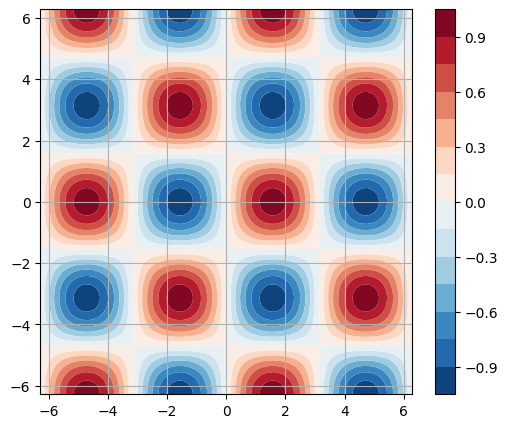

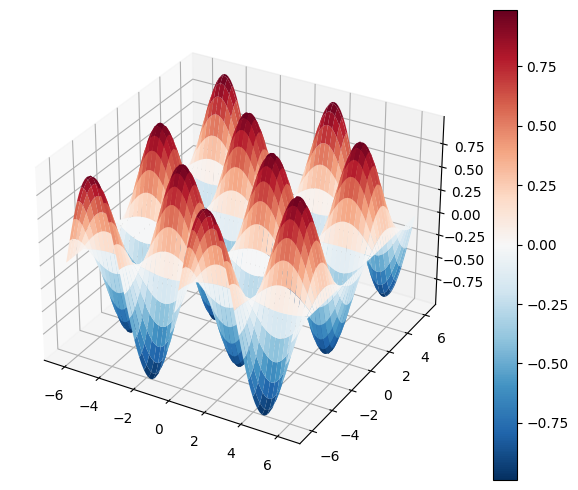

In [538]:
# Contour plot
x0 = jnp.linspace(-2 * jnp.pi, 2 * jnp.pi, 100)  # adjust the range as needed
x1 = jnp.linspace(-2 * jnp.pi, 2 * jnp.pi, 100)
x0s, x1s = jnp.meshgrid(x0, x1)
zs = fv(x0s, x1s)

# Plot the contour
plt.figure(figsize=(6, 5))
contour = plt.contourf(x0s, x1s, zs, levels=14, antialiased=True, cmap="RdBu_r")
plt.colorbar(contour)
plt.grid(True)

# 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
p3d = ax.plot_surface(x0s, x1s, zs, cmap='RdBu_r')
plt.colorbar(p3d);
plt.tight_layout()

In [531]:
x = jnp.array([1., 1.])
tol, max_iter = 1e-6, 1000
alpha = 1e-2 # 3
intermediate_xs = [x]
for i in range(max_iter):
    delta_x = alpha * jax.grad(f)(x)
    x -= delta_x
    intermediate_xs += [x]
    if jnp.sum(delta_x**2)**(1/2) < tol:
        break
print("x:            {:}".format(x))
print("f(x):         {:.4f}".format(f(x)))
print("# iterations: {:}".format(i + 1))
print("Final update: {:}".format(delta_x))

x:            [1.5706384 3.1413481]
f(x):         -1.0000
# iterations: 1000
Final update: [-1.5945830e-06 -2.4691421e-06]


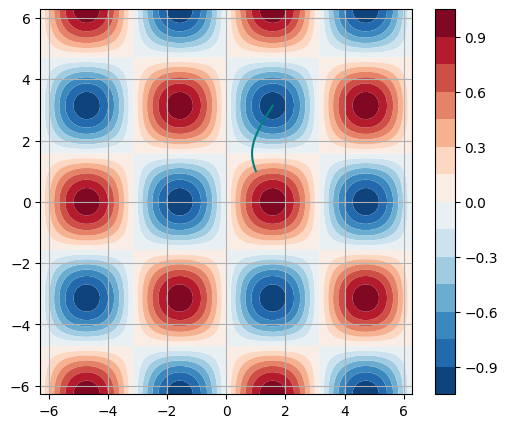

In [532]:
plt.figure(figsize=(6, 5))
contour = plt.contourf(x0s, x1s, zs, levels=14, antialiased=True, cmap="RdBu_r")
plt.colorbar(contour)
plt.grid(True)
plt.plot([x[0] for x in intermediate_xs], [x[1] for x in intermediate_xs], c='teal');

### Newton's Method

Newton's method is a simple root finding algorithm, meaning it finds zeros of a function $f:\mathbb{R}^n\to\mathbb{R}^m$. 

Let us start with a simple case $f:\mathbb{R}\to\mathbb{R}$. Newton's method is also a fixed point iteration which sets
$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}\,.$$
This only requires an initial guess $x_0$. It converges if $x_n$ is a root of $f(x)$, since then $x_{n+1}=x_n$. 

The intuitive idea behind Newton's method is to take the tangent line of $f$ at $x_i$, find where it intersects the $x$-axis, and use this value as the next value $x_{n+1}$. This tangent $t$ satisfies the equation
$$\frac{t(x_{n+1})-t(x_{n})}{x_{n+1}-x_{n}} = f'(x_n)$$
Setting $t(x_{n+1})=0$ and solving for $x_{n+1}$ gives the above result

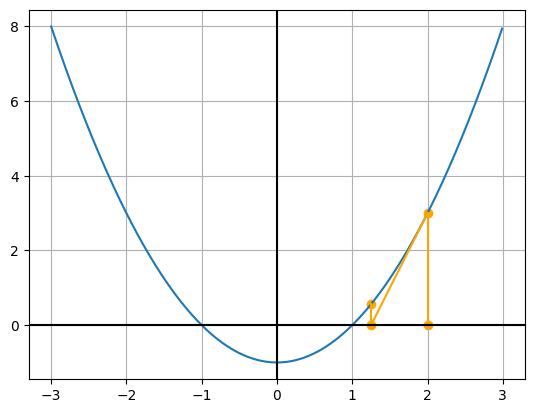

In [3]:
import matplotlib.pyplot as plt
def f(x):
    return x**2 - 1
x = jnp.arange(-3, 3, .01)
plt.plot(x, f(x));
x0 = 2
x1 = x0-f(x0)/(2*x0)
plt.scatter(x0, 0, c='orange')
plt.scatter(x0, f(x0), c='orange')
plt.plot([x0,x0], [0, f(x0)], c='orange')
plt.scatter(x1, 0, c='orange')
plt.plot([x0,x1], [f(x0), 0], c='orange')
plt.scatter(x1, f(x1), c='orange')
plt.plot([x1,x1], [0, f(x1)], c='orange')
plt.grid(True, which='both')
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

To analyze the convergence, let $x_*$ be a zero of some function $f$ (which needs to be differentiable in a neighborhood of $x_*$).

To understand the convergence rate of Newton's method, we look at the Taylor series of $f$ about the root $x_*$, truncated after the second term,
$$0=f(x_*)=f(x_n)+f'(x_n)(x_*-x_n)+ R$$
where the rest $R=\frac12 f''(\xi_n)(x_*-x_n)^2$, with $\xi_n\in[x_*,x_n]$ (if the second derivative exists). Rearranging the above equation gives
$$x_* - \left(x_n - \frac{f(x_n)}{f'(x_n)}\right)=-\frac{f''(\xi_n)}{2f'(x_n)}(x_*-x_n)^2\,.$$
Now, the term in backets on the LHS is simply $x_{n+1}$, thus
$$\epsilon_{n+1}:=|x_*-x_{n+1}|=\left|\frac{f''(\xi_n)}{2f'(x_n)}\right|\epsilon_{n}^2\,.$$

This shows that
1. Newton's method is a second order method (meaning that the next error $\epsilon_{n+1}$ goes down as the previous error squared, i.e., with $\epsilon_n^2$
2. Note that we assumed that $f'(x)\neq0$ for $x\in[x_*-\epsilon_0, x_*+\epsilon_0]$. Indeed, if $f'(x_n)=0$, the next point $x_{n+1}$ is not well-defined (division by zero). Indeed, the tangent at $x_n$ never intersects the $x$-axis. If $f'(x_n)\approx 0$, the algorithm works in principle, but the next point $x_{n+1}$ will be a far worse approximation that $x_n$.
3. If the function $f$ has a zero of multiplicity $m>1$ (meaning that $f(x_*)=f'(x_*)=\ldots=f^{(m)}(x_*)=0$), Newton's method only converges linearly instead of quadratically. If the multiplicity $m$ is known, quadratic convergence can be restored by using the iteration scheme
$$x_{n+1}=x_n-m\frac{f(x_n)}{f'(x_n)}\,.$$
Even if the root is not exactly degenerate (meaning there are two roots of multiplicity 1 very close to one another, convergence still slows down.
4. The fixed point iteration can get stuck in a loop and might not converge for special points

### 1. Vanilla Newton method

Let us illustrate these points in turn using simple functions. We start by finding a zero of $f(x)=x^2 - 1$.

As an aside, note that JAX is extremely fast in parallelizing computations (called vectorization):

In [4]:
import time
t_seq_0 = time.time()
for x in jnp.arange(-3, 3, .001):
    y = f(x)
t_seq_1 = time.time()

x = jnp.array(jnp.arange(-3, 3, .001))
t_vec_0 = time.time()
y = f(x)
t_vec_1 = time.time()

print("Sequential runtime: {:.4f} s".format(t_seq_1-t_seq_0))
print("Vectorized runtime: {:.4f} s".format(t_vec_1-t_vec_0))

Sequential runtime: 0.3380 s
Vectorized runtime: 0.0123 s


Back to Newton's method:

In [17]:
def plot_fctn(x_intermediate):
    plt.plot(x, f(x));
    for i in range(len(x_intermediate) - 1):
        x0, x1 = x_intermediate[i], x_intermediate[i+1]
        plt.scatter(x0, 0, c='orange')
        plt.scatter(x0, f(x0), c='orange')
        plt.plot([x0,x0], [0, f(x0)], c='orange')
        plt.scatter(x1, 0, c='orange')
        plt.plot([x0,x1], [f(x0), 0], c='orange')
        plt.scatter(x1, f(x1), c='orange')
        plt.plot([x1,x1], [0, f(x1)], c='orange')
        
    plt.grid(True, which='both')
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.xlim(0.5, 2)
    

def newton(f, x0, tol=1e-6, max_iter=1000):
    global x_intermediate
    x = x0
    for i in range(max_iter):
        delta_x =  f(x)/jax.grad(f)(x)
        x -= delta_x
        x_intermediate += [x]
        print("Iteration {:}".format(i + 1))
        print("x:       {:.6f}".format(x))
        print("f(x):    {:.6f}".format(f(x)))
        print("Delta x: {:.6f}\n".format(f(x)))
        if abs(delta_x) < tol or abs(f(x)) < tol:
            break
    return x

In [9]:
x0 = .7
x_intermediate = [x0]
newton(f, x0=x0);

Iteration 1
x:       1.064286
f(x):    0.132704
Delta x: 0.132704

Iteration 2
x:       1.001942
f(x):    0.003887
Delta x: 0.003887

Iteration 3
x:       1.000002
f(x):    0.000004
Delta x: 0.000004

Iteration 4
x:       1.000000
f(x):    0.000000
Delta x: 0.000000



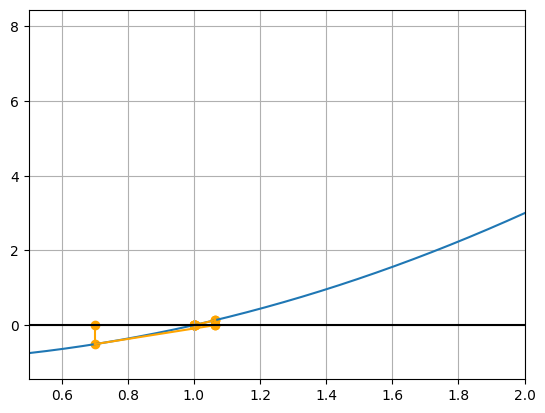

In [18]:
plot_fctn(x_intermediate)

### 2. Bad convergence if initial point is close to extremum

In [64]:
newton(f, x0=0., max_iter=2);

Iteration 1
x:       inf
f(x):    inf
Delta x: inf

Iteration 2
x:       nan
f(x):    nan
Delta x: nan



In [65]:
newton(f, x0=1e-4);

Iteration 1
x:       5000.000000
f(x):    25000000.000000
Delta x: 25000000.000000

Iteration 2
x:       2500.000000
f(x):    6249999.000000
Delta x: 6249999.000000

Iteration 3
x:       1250.000244
f(x):    1562499.625000
Delta x: 1562499.625000

Iteration 4
x:       625.000488
f(x):    390624.625000
Delta x: 390624.625000

Iteration 5
x:       312.501038
f(x):    97655.898438
Delta x: 97655.898438

Iteration 6
x:       156.252121
f(x):    24413.724609
Delta x: 24413.724609

Iteration 7
x:       78.129265
f(x):    6103.182129
Delta x: 6103.182129

Iteration 8
x:       39.071030
f(x):    1525.545410
Delta x: 1525.545410

Iteration 9
x:       19.548311
f(x):    381.136475
Delta x: 381.136475

Iteration 10
x:       9.799733
f(x):    95.034767
Delta x: 95.034767

Iteration 11
x:       4.950889
f(x):    23.511299
Delta x: 23.511299

Iteration 12
x:       2.576436
f(x):    5.638024
Delta x: 5.638024

Iteration 13
x:       1.482285
f(x):    1.197168
Delta x: 1.197168

Iteration 14
x:       1

### 3. Slow convergence for double zero

To look at a double zero, we move our parabola up, $f(x)=x^2$.

In [66]:
def f(x):
    return x**2

newton(f, x0=7.);

Iteration 1
x:       3.500000
f(x):    12.250000
Delta x: 12.250000

Iteration 2
x:       1.750000
f(x):    3.062500
Delta x: 3.062500

Iteration 3
x:       0.875000
f(x):    0.765625
Delta x: 0.765625

Iteration 4
x:       0.437500
f(x):    0.191406
Delta x: 0.191406

Iteration 5
x:       0.218750
f(x):    0.047852
Delta x: 0.047852

Iteration 6
x:       0.109375
f(x):    0.011963
Delta x: 0.011963

Iteration 7
x:       0.054688
f(x):    0.002991
Delta x: 0.002991

Iteration 8
x:       0.027344
f(x):    0.000748
Delta x: 0.000748

Iteration 9
x:       0.013672
f(x):    0.000187
Delta x: 0.000187

Iteration 10
x:       0.006836
f(x):    0.000047
Delta x: 0.000047

Iteration 11
x:       0.003418
f(x):    0.000012
Delta x: 0.000012

Iteration 12
x:       0.001709
f(x):    0.000003
Delta x: 0.000003

Iteration 13
x:       0.000854
f(x):    0.000001
Delta x: 0.000001

Iteration 14
x:       0.000427
f(x):    0.000000
Delta x: 0.000000

Iteration 15
x:       0.000214
f(x):    0.000000
Delta 

In [70]:
def newton2(f, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        delta_x =  2 * f(x)/jax.grad(f)(x)
        x -= delta_x
        print("Iteration {:}".format(i + 1))
        print("x:       {:.6f}".format(x))
        print("f(x):    {:.6f}".format(f(x)))
        print("Delta x: {:.6f}\n".format(delta_x))
        if abs(delta_x) < tol or abs(f(x)) < tol:
            break
    return x

In [71]:
newton2(f, x0=7.);

Iteration 1
x:       0.000000
f(x):    0.000000
Delta x: 7.000000



### 4. Fixed Point iteration gets stuck

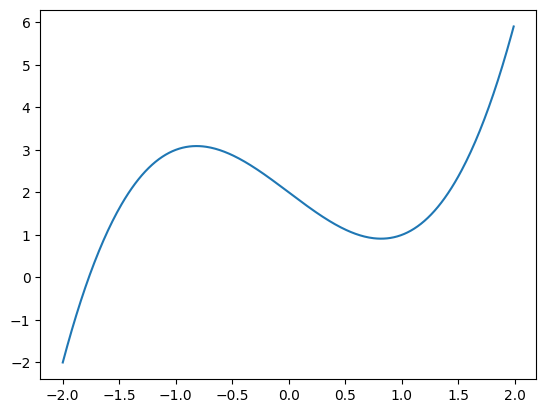

In [19]:
def f(x):
    return x**3 - 2*x + 2

x = jnp.arange(-2, 2, .01)
plt.plot(x, f(x));

In [76]:
newton(f, x0=0., max_iter=10);

Iteration 1
x:       1.000000
f(x):    1.000000
Delta x: 1.000000

Iteration 2
x:       0.000000
f(x):    2.000000
Delta x: 2.000000

Iteration 3
x:       1.000000
f(x):    1.000000
Delta x: 1.000000

Iteration 4
x:       0.000000
f(x):    2.000000
Delta x: 2.000000

Iteration 5
x:       1.000000
f(x):    1.000000
Delta x: 1.000000

Iteration 6
x:       0.000000
f(x):    2.000000
Delta x: 2.000000

Iteration 7
x:       1.000000
f(x):    1.000000
Delta x: 1.000000

Iteration 8
x:       0.000000
f(x):    2.000000
Delta x: 2.000000

Iteration 9
x:       1.000000
f(x):    1.000000
Delta x: 1.000000

Iteration 10
x:       0.000000
f(x):    2.000000
Delta x: 2.000000



### Newton's method for more general functions $f:\mathbb{R}^n\to\mathbb{R}^n$

The generalization of the 1D case
$$x_{n+1}=x_n-(f'(x_n))^{-1}f(x_n)$$
to the case $f:\mathbb{R}^n\to\mathbb{R}^n$ is
$$\vec{x}_{n+1}=\vec{x}_n-(J_f(\vec{x}_n))^{-1}f(\vec{x}_n)\,,$$
where $J_f(\vec{x}_n)^{-1}$ is the inverse Jacobian of the function $f$ evaluated at $\vec{x_n}$. In practice, one can save time and not compute the matrix inverse (which takes $\mathcal{O}(n^3)$ operations) of the Jacobian, one can rearrange the above equation and solve the linear equation system
$$J_f(\vec{x}_n)(\vec{x}_{n+1}-\vec{x}_{n})=-f(\vec{x}_n)$$
for $\vec{x}_{n+1}$ (which takes $\mathcal{O}(n^2)$ operations).

As an example, we use a simple function $f:\mathbb{R}^2\to\mathbb{R}^2$, $f(x, y)=(\cos(x), \sin(y))$.

In [88]:
def f(x0):
    x, y = x0
    return jnp.array([jnp.cos(x), jnp.sin(y)])

def newton2d_naive(f, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        delta_x =  jnp.einsum('ab,b->a', jnp.linalg.inv(jax.jacfwd(f)(x)), f(x))  # takes inverse of Jacobian
        x -= delta_x
        print("Iteration {:}".format(i + 1))
        print("x:       {:}".format(x))
        print("f(x):    {:}".format(f(x)))
        print("Delta x: {:}\n".format(delta_x))
        if jnp.sum(delta_x**2)**(1/2) < tol or jnp.max(jnp.abs(f(x))) < tol:
            break
    return x

In [90]:
newton2d_naive(f, jnp.array([1.,1.]));

Iteration 1
x:       [ 1.6420927  -0.55740786]
f(x):    [-0.07123599 -0.5289882 ]
Delta x: [-0.64209265  1.5574079 ]

Iteration 2
x:       [1.5706753  0.06593645]
f(x):    [0.00012107 0.06588868]
Delta x: [ 0.07141743 -0.6233443 ]

Iteration 3
x:       [ 1.5707964e+00 -9.5717609e-05]
f(x):    [-4.371139e-08 -9.571761e-05]
Delta x: [-0.00012107  0.06603216]

Iteration 4
x:       [1.5707964 0.       ]
f(x):    [-4.371139e-08  0.000000e+00]
Delta x: [ 4.371139e-08 -9.571761e-05]



### Newton's method for most general functions $f:\mathbb{R}^n\to\mathbb{R}^m$ with $m>n$

If $n\neq m$, the Jacobian is an $m\times n$ matrix which does not have an inverse. Non-square $(m\times n)$ matrices (for $m>n$) do have a so-called pseudo-inverse, which is an $n\times m$ matrix $J^P$ defined by
$$J^P=(J^T J)^{-1} J^T\,.$$
Note that this satisfies 
$$J^P J = (J^T J)^{-1} (J^T J) = \mathbb{1}_{n\times n}$$
If $f$ does not have a zero, this method attempts to find a solution using non-linear least squares.

Let us illustrate the method using the function, $f:\mathbb{R}^2\to\mathbb{R}^3$,   $f(x,y)=(\sin(x)+\cos(y), y\sin(x)+x^2, xy)$, which has a zero at $(x,y) = (0, \pi/2)$

In [175]:
def f(x):
    x0, x1 = x
    return jnp.array([jnp.sin(x0) + jnp.cos(x1), x1 * jnp.sin(x0) + x0**2, x0 * x1])

In [182]:
def newton_general(f, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        j = jax.jacfwd(f)(x)
        j_p = jnp.einsum('ab,cb->ac', jnp.linalg.inv(jnp.einsum('ba,bc->ac', j, j)), j)  # pseudo-inverse
        delta_x = jnp.einsum('ab,b->a', j_p, f(x))
        x -= delta_x
        print("Iteration {:}".format(i + 1))
        print("x:       {:}".format(x))
        print("f(x):    {:}".format(f(x)))
        print("Delta x: {:}\n".format(delta_x))
        if jnp.sum(delta_x**2)**(1/2) < tol or jnp.max(jnp.abs(f(x))) < tol:
            break
    return x

In [184]:
newton_general(f, jnp.array([1., 1.]));

Iteration 1
x:       [-0.02489471  1.5640845 ]
f(x):    [-0.0181804  -0.03831367 -0.03893744]
Delta x: [ 1.0248947 -0.5640845]

Iteration 2
x:       [3.1405687e-04 1.5711050e+00]
f(x):    [5.3803087e-06 4.9351493e-04 4.9341633e-04]
Delta x: [-0.02520877 -0.00702046]

Iteration 3
x:       [9.3074050e-08 1.5707964e+00]
f(x):    [4.9362662e-08 1.4620039e-07 1.4620038e-07]
Delta x: [0.00031396 0.00030858]



## Least Squares regression

Least Squares regression can be used to fit a line to a set of data points $(x_i, y_i)$. It finds a line $f(x)=ax+b$ (i.e., it finds $a$ and $b$) such that the distance squared between the line and all data points is minimized,
$$\min_{a,b} \sum_i(y_i-f(x_i))^2 = \min_{a,b} \sum_i(y_i-a x_i + b))^2$$.

Let us illustrate this using some points on a noisy line

In [539]:
x = jnp.arange(0., 3, .1)
key = jax.random.PRNGKey(seed=1)
noise = .3 * jax.random.normal(key, shape=x.shape)
y = 1.3 * (x + noise) + .5

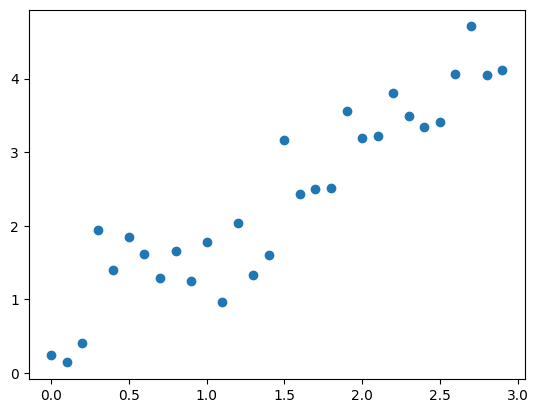

In [540]:
plt.scatter(x, y);

We can use any algorithm to find $(a,b)$ that minimize the sum of squares. Let us do gradient descent.

In [541]:
def f(params):
    a, b = params
    return a * x + b

def loss(params):
    y_hat = f(params)
    return jnp.sum((y - y_hat)**2)

def gd(params, alpha=1e-3, max_iter=1000):
    for i in range(max_iter):
        if i % 50 == 0:
            print("Current best fit: (a,b) = {}".format(params))
            print("Loss: {:.6f}".format(loss(params)))
        params -= alpha * jax.grad(loss)(params)
    return params

# some random guess for a and b
params = jax.random.normal(key, shape=(2,))

params = gd(params)


Current best fit: (a,b) = [-0.11617039  2.2125063 ]
Loss: 55.598267
Current best fit: (a,b) = [0.73872703 1.5141922 ]
Loss: 15.363049
Current best fit: (a,b) = [1.0031748 1.0315877]
Loss: 9.151935
Current best fit: (a,b) = [1.1453998  0.77203166]
Loss: 7.355348
Current best fit: (a,b) = [1.2218916 0.6324365]
Loss: 6.835680
Current best fit: (a,b) = [1.263031   0.55735886]
Loss: 6.685364
Current best fit: (a,b) = [1.2851566 0.5169804]
Loss: 6.641884
Current best fit: (a,b) = [1.2970562  0.49526405]
Loss: 6.629307
Current best fit: (a,b) = [1.3034561 0.4835844]
Loss: 6.625669
Current best fit: (a,b) = [1.3068981 0.4773028]
Loss: 6.624617
Current best fit: (a,b) = [1.3087492 0.4739246]
Loss: 6.624313
Current best fit: (a,b) = [1.3097448 0.4721076]
Loss: 6.624226
Current best fit: (a,b) = [1.3102804  0.47113028]
Loss: 6.624200
Current best fit: (a,b) = [1.3105683  0.47060478]
Loss: 6.624192
Current best fit: (a,b) = [1.3107232  0.47032213]
Loss: 6.624191
Current best fit: (a,b) = [1.310806

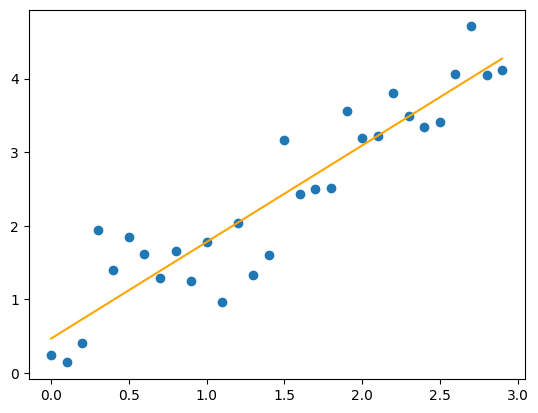

In [542]:
x = jnp.arange(0., 3, .1)
plt.scatter(x, y);
xp = jnp.arange(0., 3, .1)
plt.plot(xp, params[0] * xp + params[1], c='orange');

While using GD is a good idea in general, this case is so simple that it can be solved analytically by setting the gradient to zero:
$$\vec{\nabla}_{a,b} L=0=\vec{\nabla}_{a,b}\sum_i(y_i-\hat{y}_i)^2=\vec{\nabla}_{a,b}\sum_i(y_i-(a x_i+b))^2$$
$$\begin{pmatrix}-2\sum_i x_i(y_i-(a x_i+b))=0\\-2\sum_i (y_i-(a x_i+b))=0\end{pmatrix}= \begin{pmatrix}\sum_i x_iy_i-a \sum_i x_i^2 - \sum_i x_i b=0\\\sum_i y_i-a \sum_i x_i - Nb=0\end{pmatrix}$$

This is a linear system of two equations in two unknowns $a,b$, which can be easily solved:
$$a=\left(N\sum_i x_i y_i - \sum_i  x_i\sum_i  y_i\right)/\left(N\sum_i x_i^2 - \left(\sum_i x_i\right)^2\right)$$
$$b=-\left(\sum_i x_i \sum_i x_i y_i - \sum_i x_i^2 \sum_i y_i\right)/\left(N\sum_i x_i^2 - \left(\sum_i x_i\right)^2\right)$$

In [543]:
n = len(x)
a_exact = (n * jnp.sum(x*y) - jnp.sum(x) * jnp.sum(y)) / (n * jnp.sum(x**2) - jnp.sum(x)**2)
b_exact = -(jnp.sum(x) * jnp.sum(x*y) - jnp.sum(x**2) * jnp.sum(y)) / (n * jnp.sum(x**2) - jnp.sum(x)**2)

In [544]:
# Compare the results
print("Parameters of noised line:      ({:.3f}, {:.3f})".format(1.3, 0.5))
print("Parameters found by GD:         ({:.3f}, {:.3f})".format(*params))
print("Exact solution to optimization: ({:.3f}, {:.3f})".format(a_exact, b_exact))

Parameters of noised line:      (1.300, 0.500)
Parameters found by GD:         (1.311, 0.470)
Exact solution to optimization: (1.311, 0.470)


Just for fun, let us see whether a parabola would have been a better fit

In [545]:
def f(params):
    a, b, c = params
    return a * x**2 + b * x + c

# some random guess for a, b, c
params = jax.random.normal(key, shape=(3,))
params = gd(params)


Current best fit: (a,b) = [ 0.17269018 -0.64765567  1.2229712 ]
Loss: 130.607300
Current best fit: (a,b) = [ 0.51494205 -0.27775732  1.3189019 ]
Loss: 9.056049
Current best fit: (a,b) = [ 0.46628332 -0.13861312  1.2631538 ]
Loss: 8.557587
Current best fit: (a,b) = [ 0.4277344  -0.01937963  1.1998354 ]
Loss: 8.163322
Current best fit: (a,b) = [0.3941296  0.08664346 1.140207  ]
Loss: 7.844846
Current best fit: (a,b) = [0.36412564 0.18174344 1.0860368 ]
Loss: 7.587302
Current best fit: (a,b) = [0.33718765 0.26721552 1.0372103 ]
Loss: 7.379025
Current best fit: (a,b) = [0.3129717  0.34406924 0.9932786 ]
Loss: 7.210588
Current best fit: (a,b) = [0.29119644 0.41318065 0.95376694]
Loss: 7.074371
Current best fit: (a,b) = [0.27161464 0.47533104 0.9182339 ]
Loss: 6.964208
Current best fit: (a,b) = [0.25400504 0.531222   0.88627917]
Loss: 6.875121
Current best fit: (a,b) = [0.23816912 0.58148366 0.85754275]
Loss: 6.803073
Current best fit: (a,b) = [0.22392806 0.62668324 0.8317006 ]
Loss: 6.74480

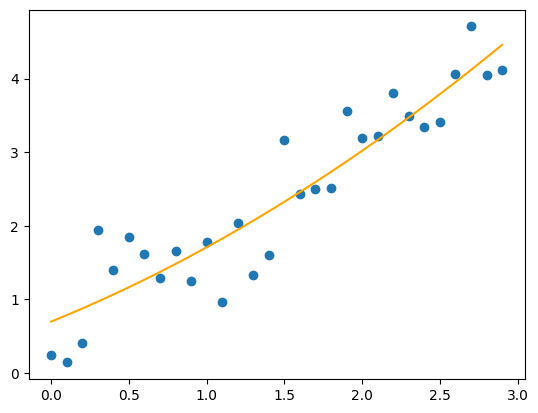

In [546]:
x = jnp.arange(0., 3, .1)
plt.scatter(x, y);
xp = jnp.arange(0., 3, .1)
plt.plot(xp, params[0] * xp**2 + params[1]*xp + params[2], c='orange');

This is a slight improvement (the loss is slightly lower).

Note that a degree $0$ polynomial (i.e., a constant) can fit one data point exaxtly, a degree 1 polynomial (i.e., a line) can fit 2 data points exactly, etc. So a degree $p$ polynomial can fit $(p-1)$ data points exactly. However, a degree $p$ polynomial als has $(p-1)$ extrema, so it oscillates wildly between data points, which is usually not a good fit and can lead to instabilities.

In [547]:
@jax.jit
def f(z):
    z = jnp.repeat(z, len(x))
    terms = jnp.array([y[i] * jnp.prod(jnp.array([(z[i] - x[j])/(x[i]-x[j]) for j in range(len(x)) if j != i]), 0) for i in range(len(x))])
    return jnp.sum(terms)

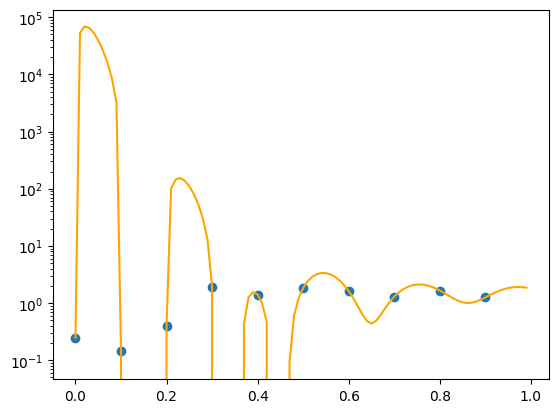

In [549]:
x = jnp.arange(0., 3, .1)
plt.scatter(x[:10], y[:10]);
xp = jnp.arange(0., 1, .01)
plt.plot(xp, jax.vmap(f)(xp), c='orange');
plt.yscale('log')

This shows that fitting high-order polynomials to data is a terrible idea. The effect is known as overfitting or bias-variance tradeoff. The loss on the "training data" is zero; the function matches on all $x_i$ by construction. But given that we sampled this from a noisy line, the regression error on unseen data would be huge ($10^5$ in the extreme case for small $x_i|$).

For this reason, one typically uses so-called cubic splines. These are cubic polynomials that interpolate between two points $x_i$ and $x_{i+1}$. The full interpolating function is then a piecewise defined function, which is spliced together from the $N-1$ splines that connect the $N$ points $x_i$. The reason why one uses a cubic function is that one has 4 parameters. 2 Have to be used up to get the function to go through the points $x_i$ and $x_{i+1}$ (i.e., to make it continuous). The other 2 can be used to arrange that the first derivatives at the end points of the splines match as well. 




Another generalization is to keep the map simple and fit an affine map of the form $\vec{y}=A\vec{x}+\vec{b}$ to data points $(\vec{x}_i,\vec{y}_i)$.

Let us illustrate the idea using noised data in 3D

In [414]:
x = 10 * jax.random.uniform(key, shape=(100, 3,))
noise = .3 * jax.random.normal(key, shape=x.shape)
A, b = jax.random.uniform(key, shape=(3, 3,)), jax.random.uniform(key, shape=(3,))
y = jnp.einsum('ij,xj->xi', A, x + noise) + b

In [421]:
def f(params):
    a, b = params[:-3], params[-3:]
    a = a.reshape((3, 3))
    return jnp.einsum('ij,xj->xi', a, x) + b

def loss(params):
    y_hat = f(params)
    return jnp.sum((y - y_hat)**2)

def gd(params, alpha=1e-4, max_iter=3000):
    for i in range(max_iter):
        if i % 50 == 0:
            a, b = params[:-3], params[-3:]
            print("Current best fit: (a,b) = ({:}, {:})".format(a.reshape((3, 3)), b))
            print("Loss: {:.6f}".format(loss(params)))
        params -= alpha * jax.grad(loss)(params)
    return params

# some random guess for a and b
params = jax.random.normal(key, shape=(3*3 + 3,))

params = gd(params)

Current best fit: (a,b) = ([[ 0.07545026 -1.0032071  -1.1431501 ]
 [-0.14357094  0.5904228  -1.4384177 ]
 [-0.03499871  0.14507416  0.23655683]], [ 1.5627991 -1.1358407  0.9167496])
Loss: 61958.425781
Current best fit: (a,b) = ([[0.7305418  0.22557329 0.06566513]
 [0.62486774 0.9959242  0.3541953 ]
 [0.83389527 0.96975744 0.3465293 ]], [ 1.5784398  -0.9442035   0.91867894])
Loss: 41.272522
Current best fit: (a,b) = ([[0.7400761  0.2365649  0.07258451]
 [0.62289196 0.99377894 0.3530183 ]
 [0.8406676  0.9774109  0.35118303]], [ 1.4266791 -0.9149534  0.8132255])
Loss: 34.193146
Current best fit: (a,b) = ([[0.7487704  0.24652296 0.0787966 ]
 [0.621216   0.9918595  0.35182095]
 [0.84670925 0.9843307  0.3554997 ]], [ 1.2892084  -0.8884544   0.71769863])
Loss: 28.384129
Current best fit: (a,b) = ([[0.7566461  0.25554347 0.08442382]
 [0.6196979  0.99012065 0.35073626]
 [0.85218203 0.99059886 0.35940996]], [ 1.1646811 -0.8644506  0.6311662])
Loss: 23.617506
Current best fit: (a,b) = ([[0.763780

## Neural Networks

Neural networks use affine maps of the above type, interwoven with non-linear maps. An ansatz like the above can only ever represent an affine function $f:\mathbb{R}^n\to\mathbb{R}^m$, with $f(\vec{x})=A\vec{x}+\vec{b}$. One could try to make $f$ more powerful by adding two fitting steps, $f=f_1 \circ f_2$ with $f_2:\mathbb{R}^n\to \mathbb{R}^h$ and $f_1:\mathbb{R}^h\to \mathbb{R}^m$. Then 
$$f(\vec{x})=f_1(f_2(\vec{x}))=W_1(W_2\vec{x}+\vec{b}_2)+\vec{b}_1$$
where $W_1$ is an $m\times h$ matrix, $W_2$ is an $h\times n$ matrix, $\vec{b}_2$ is a $h$-component vector, and $\vec{b}_1$ is a $m$-component vector. But affine maps are closed under composition, so the above is again an affine map (with some matrix factorization),
$$W_1(W_2\vec{x}+\vec{b}_2)+\vec{b}_1=(W_1W_2)\vec{x} + (W_1\vec{b}_2+\vec{b}_1)=W\vec{x}+\vec{b}\,.$$

So if we want to make the function more complicated, we need to prevent this "collapse". A simple way to do so is to apply a non-linear function $\sigma(\vec{x})$ to each component of the intermediate vector in $\mathbb{R}^h$ in between the two affine maps:
$$f(\vec{x})=f_1(\sigma(f_2(\vec{x})))=W_1\sigma(W_2\vec{x}+\vec{b}_2)+\vec{b}_1$$


First we generate some training set

In [6]:
import jax
import jax.numpy as jnp
import time
from jax import grad, jit, vmap
from jax import random
key = random.PRNGKey(17)

# To illustrate this, we generate some training data
def target(xy):
    x, y = xy
    return jnp.sin(x) * jnp.cos(y)
X = jnp.array([[i, j] for i in jnp.linspace(-jnp.pi, jnp.pi, 100) for j in jnp.linspace(-jnp.pi, jnp.pi, 100)])
X = jax.random.permutation(key, X)

start = time.time()
y = jnp.array([target(x) for x in X])
print("Consecutive Computation took {:.4f} seconds".format(time.time() - start))

start = time.time()
y = vmap(target)(X)
print("Parallel Computation took {:.4f} seconds".format(time.time() - start))

# train:test split
X_train, X_test = X[:int(.9 * len(X))], X[int(.9 * len(X)):]
y_train, y_test = y[:int(.9 * len(y))], y[int(.9 * len(y)):]

Consecutive Computation took 0.7624 seconds
Parallel Computation took 0.0021 seconds


Now we train a NN to reproduce the function

In [45]:
key = random.PRNGKey(0)
# Neural network architecture
def init_network_params(key):
    sizes = [2, 100, 100, 1]  # Number of nodes in each layer
    keys = random.split(key, len(sizes) - 1)
    params = [(1/jnp.sqrt(n) * random.normal(k, (m, n)), 1/n * random.normal(k, (n,))) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]
    return params

@jit
def relu(x):
    return jnp.maximum(0, x)

@jit
def neural_network(params, x):
    for i, (w, b) in enumerate(params):
        x = jnp.dot(x, w) + b
        if i != len(params) - 1:
            x = relu(x)
    return x

# Mean squared error loss
@jit
def loss(params, x, y_true):
    y_pred = neural_network(params, x)
    return jnp.mean((y_pred.flatten() - y_true) ** 2)

# Training loop
def train(params, X, y, learning_rate=1e-2, epochs=list(range(101))):
    X_train, X_test = X
    y_train, y_test = y
    for epoch in epochs:
        train_loss, test_loss = loss(params, X_train, y_train), loss(params, X_test, y_test)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        gradients = grad(loss)(params, X_train, y_train)
        params = [(w - learning_rate * dw, b - learning_rate * db) for (w, b), (dw, db) in zip(params, gradients)]
        if epoch % 10 == 0:
            print("Epoch {:3d}, Train Loss: {:.4f}, Test Loss: {:.4f}".format(epoch, train_loss, test_loss))
    return params

# Initialize network parameters
params = init_network_params(key)
print("Summary of NN:")
total_num = 0
for i in range(len(params)):
    total_num += params[i][0].shape[0] * params[i][0].shape[1] + params[i][1].shape[0]
    print("Layer {}: Weights: {}, Biases: {}, Total: {} parameters".format(i + 1, 
                                                                     params[i][0].shape, 
                                                                     params[i][1].shape, 
                                                                     params[i][0].shape[0] * params[i][0].shape[1] + params[i][1].shape[0])
         )
print("The NN has {} parameters.\n\n".format(total_num))

# Train the neural network
print("Training the NN...")
epochs, train_losses, test_losses = list(range(801)), [], []
params = train(params, (X_train, X_test), (y_train, y_test), learning_rate=5e-3, epochs=epochs)


Summary of NN:
Layer 1: Weights: (2, 100), Biases: (100,), Total: 300 parameters
Layer 2: Weights: (100, 100), Biases: (100,), Total: 10100 parameters
Layer 3: Weights: (100, 1), Biases: (1,), Total: 101 parameters
The NN has 10501 parameters.


Training the NN...
Epoch   0, Train Loss: 0.4503, Test Loss: 0.4410
Epoch  10, Train Loss: 0.1507, Test Loss: 0.1461
Epoch  20, Train Loss: 0.1063, Test Loss: 0.1032
Epoch  30, Train Loss: 0.0838, Test Loss: 0.0816
Epoch  40, Train Loss: 0.0693, Test Loss: 0.0678
Epoch  50, Train Loss: 0.0588, Test Loss: 0.0577
Epoch  60, Train Loss: 0.0510, Test Loss: 0.0501
Epoch  70, Train Loss: 0.0449, Test Loss: 0.0441
Epoch  80, Train Loss: 0.0402, Test Loss: 0.0395
Epoch  90, Train Loss: 0.0367, Test Loss: 0.0361
Epoch 100, Train Loss: 0.0338, Test Loss: 0.0332
Epoch 110, Train Loss: 0.0315, Test Loss: 0.0310
Epoch 120, Train Loss: 0.0295, Test Loss: 0.0291
Epoch 130, Train Loss: 0.0279, Test Loss: 0.0275
Epoch 140, Train Loss: 0.0266, Test Loss: 0.0261


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

train_hist = pd.DataFrame({
    'epochs': jnp.array(epochs, dtype=int),
    'train_loss': jnp.array(train_losses),
    'test_loss': jnp.array(test_losses)
})
train_hist

,epochs,train_loss,test_loss
0,0,0.450348,0.440982
1,1,0.266270,0.256249
2,2,0.239330,0.231624
3,3,0.222296,0.214988
4,4,0.207822,0.201296
...,...,...,...
796,796,0.013857,0.013759
797,797,0.013852,0.013754
798,798,0.013847,0.013749
799,799,0.013843,0.013744


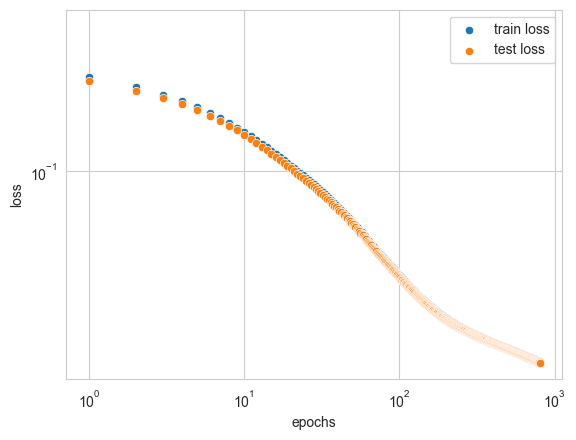

In [47]:
sns.scatterplot(x='epochs', y='train_loss', data=train_hist, label='train loss')
sns.scatterplot(x='epochs', y='test_loss', data=train_hist, label='test loss')
plt.ylabel('loss')
plt.yscale('log')
plt.xscale('log')

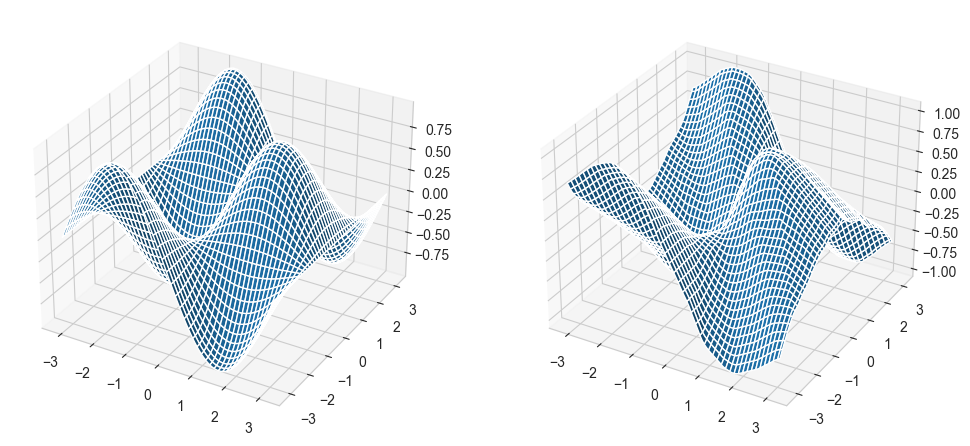

In [50]:
def f(x, y):
    return jnp.sin(x) * jnp.cos(y)

x = jnp.linspace(-jnp.pi, jnp.pi, 100)
y = jnp.linspace(-jnp.pi, jnp.pi, 100)

# Create a meshgrid
xx, yy = jnp.meshgrid(x, y)
zz = target((xx, yy))
zz_nn = jnp.array([neural_network(params, jnp.array([[x[i], y[j]] for i in range(len(xx))])) for j in range(len(yy))])
zz_nn = jnp.einsum('ijk->ij', zz_nn)

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xx, yy, zz)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xx, yy, zz_nn)
plt.show()